Here I attempt to use the aoe2.net api to extract the game lengths of online games.

In [305]:
api = 'https://aoe2.net';

In [306]:
url = [api '/api/strings' '?game=aoe2hd'];
options = weboptions('ContentType','json');
info =  webread(url,options);

In [416]:
%%file get_AOE_data.m
function data=get_AOE_data(startTime, endTime)
    api = 'https://aoe2.net';
    startT = posixtime(startTime);
    endT   = posixtime(endTime);
    iTime = startT;
    k = 1;
    while iTime<endT
    url = [api '/api/matches' '?game=aoe2de&count=1000&since=',num2str(iTime)];
    [~,temp1] = system(['curl -sX GET "' url '"']);
    temp = jsondecode(temp1);
%   options = weboptions('ContentType','json');
%   temp = webread(url,options);
     l = length(temp);
     data(k:1:(k-1)+l) =  temp;
     k = k+l;
     iTime = data(end).finished;
     disp([num2str(100*(1-(endT-iTime)./(endT-startT)),'%10.2f') '%']);
    end
end

Created file 'C:\Users\nithin\Documents\GitHub\energy-height-conversion\Tools\Routines\FHI\get_AOE_data.m'.


In [417]:
data1 = get_AOE_data(datetime('29-Nov-2020','ConvertFrom','DD-mmm-YYYY'),datetime('29-Nov-2020 10:00','ConvertFrom','DD-mmm-YYYY HH:MM'));

In [418]:
TT = struct2table(data1);
TT.leaderboard_id(cellfun(@isempty,TT.leaderboard_id))={nan};
TT.leaderboard_id = cell2mat(TT.leaderboard_id);
TT.duration = datetime(TT.finished,'ConvertFrom','posix')-datetime(TT.started,'ConvertFrom','posix');

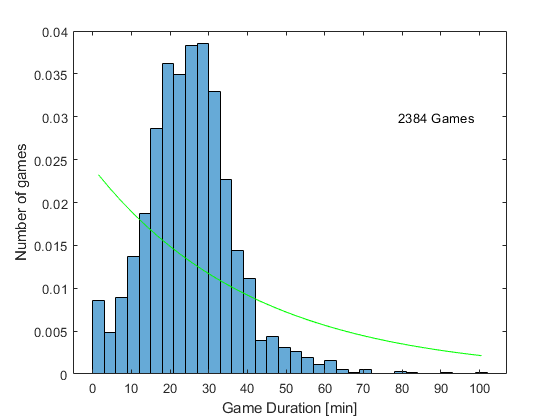

In [434]:
%%plot inline
ratingType = 2;
Xh=histogram(minutes(TT.duration(TT.num_players==2 & TT.rating_type==ratingType )),'Normalization','pdf');
xlabel('Game Duration [min]');
ylabel('Number of games');
text(0.75,0.75,[num2str(sum(TT.num_players==2 & TT.rating_type==ratingType)) ' Games'],'Units','normalized');
Xy = Xh.Values;
Xx =  Xh.BinEdges(1:end-1)+Xh.BinWidth/2;
fitfun = fittype(@(a,x) a.*exp(-a.*x));
r0 = 0.1;
[Xy_fit, gof] = fit(Xx',Xy',fitfun,'StartPoint',r0);
hold on;
plot(Xx,Xy_fit(Xx),'g');

In [436]:
gof


gof = 

  struct with fields:

           sse: 0.0039
       rsquare: 0.3139
           dfe: 33
    adjrsquare: 0.3139
          rmse: 0.0109




In [410]:
test=TT.players{strcmp(TT.match_id,'52016732')};
test(2)


ans = 

  struct with fields:

       profile_id: 3364313
         steam_id: '76561199037075126'
             name: '19jhess'
             clan: []
          country: 'US'
             slot: 2
        slot_type: 1
           rating: 1000
    rating_change: 0
            games: []
             wins: []
           streak: []
            drops: []
            color: 6
             team: 1
              civ: 29
              won: 1




Undefined function or variable 'Xy_fit'.



Error: -1